In [6]:
import warnings; 
warnings.simplefilter('ignore')

# Import
- Cases Daily

In [7]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [8]:
# Are also total cases but also divided into the different states
casesURL = "https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv"
incidenceURL = "https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/more-data/7di-rl-by-ags.csv"
df=pd.read_csv(casesURL)
df.head()
df = df.loc[:, ['time_iso8601','DE-BW']]
df["dailyChange"] =  df['DE-BW'].diff().fillna(df['DE-BW'])
df.drop(['DE-BW'], axis=1, inplace=True)
df.head()

,time_iso8601,dailyChange
0,2020-03-02T17:00:00+0000,30.0
1,2020-03-03T17:00:00+0000,24.0
2,2020-03-04T17:00:00+0000,38.0
3,2020-03-05T17:00:00+0000,36.0
4,2020-03-06T17:00:00+0000,51.0


# Formatting in right structure

In [9]:
df['y'] = df["dailyChange"]
df["ds"] = pd.to_datetime(df['time_iso8601']).dt.date

df.drop(['dailyChange', 'time_iso8601'], axis=1, inplace=True)
df.head()

,y,ds
0,30.0,2020-03-02
1,24.0,2020-03-03
2,38.0,2020-03-04
3,36.0,2020-03-05
4,51.0,2020-03-06


# Train the Model

In [5]:
m = Prophet(interval_width=0.95, daily_seasonality=True,yearly_seasonality=True)
#, changepoints=str(formatDf['ds'].iloc[-1]).split(' ')[0]
model = m.fit(df)
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.tail()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
420,2021-04-26,1631.037120,608.856496,2093.855758,1630.926033,1631.154416,-236.249324,-236.249324,-236.249324,125.138931,...,-352.772760,-352.772760,-352.772760,-8.615494,-8.615494,-8.615494,0.0,0.0,0.0,1394.787796
421,2021-04-27,1634.762192,1113.363032,2650.143298,1634.630383,1634.919807,257.491303,257.491303,257.491303,125.138931,...,176.212315,176.212315,176.212315,-43.859942,-43.859942,-43.859942,0.0,0.0,0.0,1892.253495
422,2021-04-28,1638.487264,1293.617225,2789.141772,1638.317131,1638.682846,398.567095,398.567095,398.567095,125.138931,...,350.894691,350.894691,350.894691,-77.466527,-77.466527,-77.466527,0.0,0.0,0.0,2037.054359
423,2021-04-29,1642.212336,1221.475652,2699.493001,1642.014056,1642.440590,293.982492,293.982492,293.982492,125.138931,...,278.215517,278.215517,278.215517,-109.371956,-109.371956,-109.371956,0.0,0.0,0.0,1936.194828
424,2021-04-30,1645.937408,998.944807,2529.838929,1645.711137,1646.197737,136.897275,136.897275,136.897275,125.138931,...,151.302787,151.302787,151.302787,-139.544442,-139.544442,-139.544442,0.0,0.0,0.0,1782.834684


# Plotting the Result

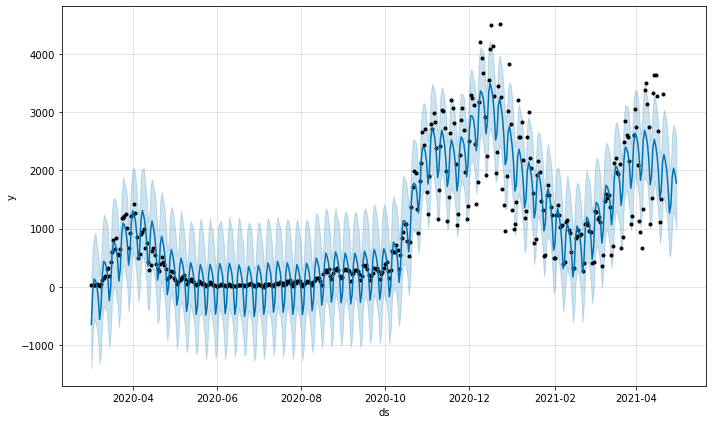

In [6]:
plot1 = m.plot(forecast)

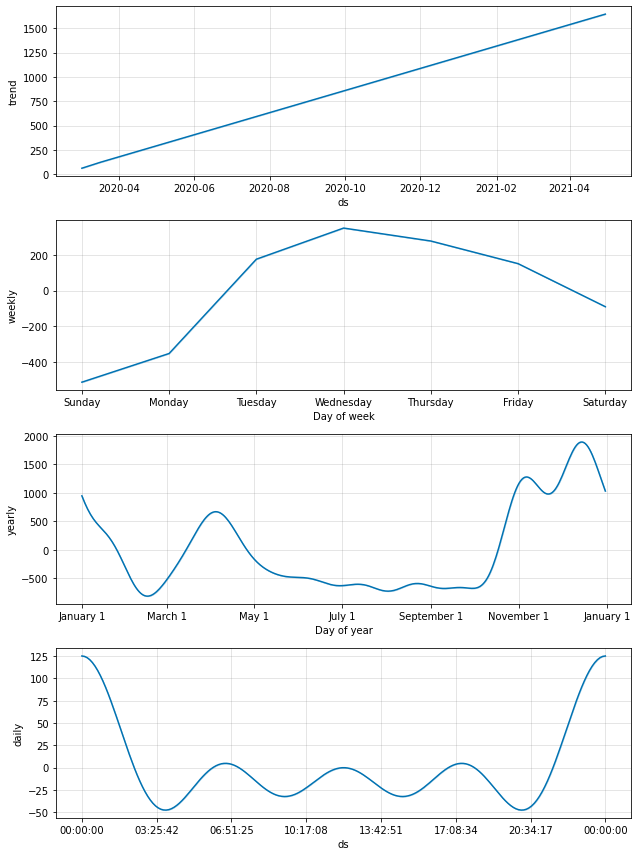

In [7]:
plt2 = m.plot_components(forecast)